# Mesure d'une distance par écholocalisation

In [1]:
import serial

try:
    liaison = serial.Serial('COM3',9600)
    print("Liaison établie")
    for i in range (10):
        Valeur = liaison.readline().decode().strip().split()
        print(Valeur[0])
    liaison.close()
    print("Fin de l'acquisition")
except:
    print("problème port série")

Liaison établie
7787
7787
7813
7814
7839
7787
7813
7814
7839
7788
Fin de l'acquisition


In [48]:
liaison.close()

## Récupération et stockage des valeurs

In [3]:
import serial

try:
    liaison = serial.Serial('COM3',9600)
    print("Liaison établie")
    Temps = []
    for i in range (100):
        Valeur = liaison.readline().decode().strip().split()
        Temps.append(float(Valeur[0]))
    liaison.close()
    print("Fin de l'acquisition")
    print(Temps)
except:
    print("problème port série")

Liaison établie
Fin de l'acquisition
[7813.0, 7811.0, 7837.0, 7787.0, 7839.0, 7813.0, 7914.0, 7813.0, 7813.0, 7814.0, 7889.0, 7813.0, 7787.0, 7839.0, 7843.0, 7820.0, 7819.0, 7819.0, 7820.0, 7920.0, 7820.0, 7795.0, 7819.0, 7813.0, 7840.0, 7814.0, 7865.0, 7787.0, 7914.0, 7787.0, 7788.0, 7814.0, 7839.0, 7813.0, 7813.0, 7812.0, 7786.0, 7787.0, 7838.0, 7838.0, 7812.0, 7812.0, 7786.0, 7837.0, 7786.0, 7811.0, 7812.0, 7785.0, 7784.0, 7784.0, 7837.0, 7837.0, 7918.0, 7818.0, 7793.0, 7818.0, 7844.0, 7819.0, 7819.0, 7837.0, 7837.0, 7786.0, 7862.0, 7785.0, 7784.0, 7809.0, 7785.0, 7813.0, 7785.0, 7887.0, 7911.0, 7862.0, 7811.0, 7837.0, 7912.0, 7843.0, 7842.0, 7816.0, 7790.0, 7789.0, 7842.0, 7817.0, 7817.0, 7816.0, 7790.0, 7790.0, 7791.0, 7791.0, 7816.0, 7842.0, 7791.0, 7816.0, 7791.0, 7836.0, 7835.0, 7783.0, 7783.0, 7782.0, 7808.0, 7782.0]


## Analyse des données récupérés 

In [4]:
def moyenne(tableau):
    return sum(tableau, 0.0) / len(tableau)

print("la moyenne est de : ",moyenne(Temps))

la moyenne est de :  7820.19


In [5]:
def variance(tableau):
    m = moyenne(tableau)
    return moyenne([(x-m)**2 for x in tableau])

print("la variance est de : ",variance(Temps))

def ecartype(tableau):
    return variance(tableau)**0.5

print("l'ecart type est de :",ecartype(Temps))

la variance est de :  1118.3539
l'ecart type est de : 33.44179869564435


## Histogramme des mesures

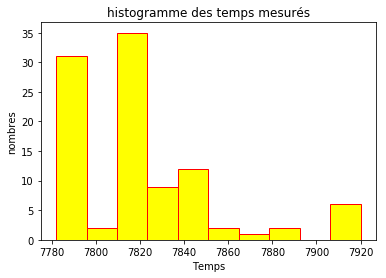

In [7]:
import matplotlib.pyplot as plt

try :
    plt.hist(Temps, bins = 10, color = 'yellow', edgecolor = 'red')
    plt.xlabel('Temps')
    plt.ylabel('nombres')
    plt.title('histogramme des temps mesurés')
    plt.show()
except:
    print("Graphique non traçable")


In [8]:
def distance(temps) :
    return moyenne(temps)*345e-6 / 2

def incertitude (temps) :
    return ecartype(temps)*345e-6 / 2 / len(temps)**0.5 
print("l'objet se trouve à ",distance(Temps),"m à + ou -",incertitude(Temps),"m")

l'objet se trouve à  1.3489827749999999 m à + ou - 0.0005768710274998651 m
